In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
df = pd.read_csv('coviddata.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

iso_code                             290
continent                            580
location                               0
date                                   0
total_cases                          636
new_cases                            862
new_cases_smoothed                  1644
total_deaths                         636
new_deaths                           862
new_deaths_smoothed                 1644
total_cases_per_million              926
new_cases_per_million                926
new_cases_smoothed_per_million      1709
total_deaths_per_million             926
new_deaths_per_million               926
new_deaths_smoothed_per_million     1709
new_tests                          32054
total_tests                        31629
total_tests_per_thousand           31629
new_tests_per_thousand             32054
new_tests_smoothed                 29649
new_tests_smoothed_per_thousand    29649
tests_per_case                     31274
positive_rate                      30811
tests_units     

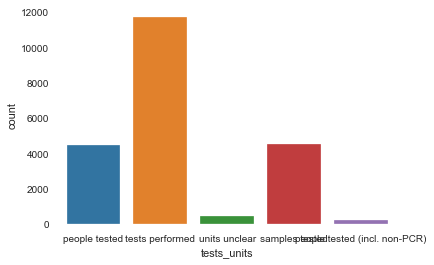

In [5]:
sns.countplot(df.tests_units)
plt.show()

In [6]:
drop = ['date','new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million','new_cases_smoothed_per_million',
                'new_deaths_smoothed_per_million', 'new_tests_smoothed',
                'new_tests_smoothed_per_thousand','new_cases_per_million', 'total_deaths_per_million',
         
        'new_deaths_per_million','total_tests_per_thousand', 
                'new_tests_per_thousand','stringency_index',
                'new_tests','population','population_density','median_age','aged_65_older','aged_70_older',
                'gdp_per_capita','extreme_poverty','diabetes_prevalence','life_expectancy','male_smokers','female_smokers']

In [7]:
df = df.drop(drop,axis=1)

In [8]:
df.dtypes

iso_code                       object
continent                      object
location                       object
total_cases                   float64
new_cases                     float64
total_deaths                  float64
new_deaths                    float64
total_tests                   float64
tests_per_case                float64
positive_rate                 float64
tests_units                    object
cardiovasc_death_rate         float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
human_development_index       float64
dtype: object

In [9]:
len(df),len(df.columns)

(50301, 15)

In [10]:
# delet if null value on more than 15 columns
df = df.dropna(axis=0, how='any', thresh=15)
df = df.dropna(axis=1, how='all', thresh=0.5*len(df))

In [11]:
len(df),len(df.columns)

(5547, 15)

In [12]:
df.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,tests_per_case,positive_rate,tests_units,cardiovasc_death_rate,handwashing_facilities,hospital_beds_per_thousand,human_development_index
3780,BGD,Asia,Bangladesh,5.0,2.0,0.0,0.0,381.0,108.5,0.009,tests performed,298.003,34.808,0.8,0.608
3781,BGD,Asia,Bangladesh,8.0,3.0,0.0,0.0,427.0,47.6,0.021,tests performed,298.003,34.808,0.8,0.608
3782,BGD,Asia,Bangladesh,10.0,2.0,0.0,0.0,463.0,36.0,0.028,tests performed,298.003,34.808,0.8,0.608
3783,BGD,Asia,Bangladesh,10.0,0.0,0.0,0.0,499.0,37.0,0.027,tests performed,298.003,34.808,0.8,0.608
3784,BGD,Asia,Bangladesh,17.0,7.0,0.0,0.0,564.0,21.0,0.048,tests performed,298.003,34.808,0.8,0.608


In [13]:
from sklearn.preprocessing import LabelEncoder
def encoder(data):
    for column in data:
        if data[column].dtypes == 'object':
            X = [data[column]]
            X = np.hstack(X)

            enc = LabelEncoder()
            try:
                enc.fit(X)
                data[column] = enc.transform(data[column])
            except Exception:
                print(column)
#                 raise TypeError('Error with datatypes! ')
    return data

In [14]:
x = encoder(df)
x.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,tests_per_case,positive_rate,tests_units,cardiovasc_death_rate,handwashing_facilities,hospital_beds_per_thousand,human_development_index
3780,0,1,0,5.0,2.0,0.0,0.0,381.0,108.5,0.009,2,298.003,34.808,0.8,0.608
3781,0,1,0,8.0,3.0,0.0,0.0,427.0,47.6,0.021,2,298.003,34.808,0.8,0.608
3782,0,1,0,10.0,2.0,0.0,0.0,463.0,36.0,0.028,2,298.003,34.808,0.8,0.608
3783,0,1,0,10.0,0.0,0.0,0.0,499.0,37.0,0.027,2,298.003,34.808,0.8,0.608
3784,0,1,0,17.0,7.0,0.0,0.0,564.0,21.0,0.048,2,298.003,34.808,0.8,0.608


In [15]:
#> Normalize

from sklearn.preprocessing import normalize
normalized = normalize(x)
print(normalized[0:2])
#> find k value for KMeans Algorithm
#> cluster to that k Value

[[0.00000000e+00 2.01216756e-03 0.00000000e+00 1.00608378e-02
  4.02433513e-03 0.00000000e+00 0.00000000e+00 7.66635842e-01
  2.18320181e-01 1.81095081e-05 4.02433513e-03 5.99631971e-01
  7.00395286e-02 1.60973405e-03 1.22339788e-03]
 [0.00000000e+00 1.90799689e-03 0.00000000e+00 1.52639751e-02
  5.72399067e-03 0.00000000e+00 0.00000000e+00 8.14714672e-01
  9.08206519e-02 4.00679347e-05 3.81599378e-03 5.68588797e-01
  6.64135557e-02 1.52639751e-03 1.16006211e-03]]


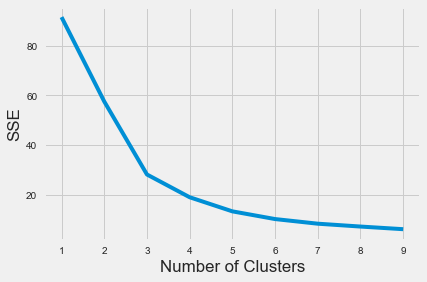

3


In [16]:
#> find k value for KMeans Algorithm
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

sse = []
for k in range(1, 10):
    M = KMeans(n_clusters=k,n_init=3,max_iter=500,random_state=2000)
    M = M.fit(normalized)
    sse.append(M.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
# print('(Using Elbow method) We can see', kl.elbow, 'is optimal number of clusters')
print(kl.elbow)
#> cluster to that k Value

In [17]:
#> cluster to that k Value
model = KMeans(n_clusters=3,n_init=3,max_iter=500,random_state=2000)
fit = model.fit(normalized)
pred = fit.labels_

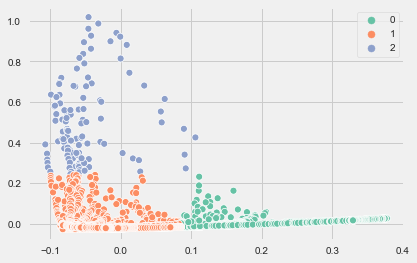

In [18]:
#> visualization
from sklearn.decomposition import PCA
import seaborn as sns
def prepare_pca( n_components, data, labels):
    names = list(map(chr, range(97, 97 + n_components)))
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i: names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = labels

    sns.scatterplot(x=df_matrix.a.values, y=df_matrix.b.values, 
                     hue=df_matrix.labels.values, palette='Set2')
prepare_pca(3,normalized,pred)


In [19]:
data = df

---

In [20]:
Y = data["total_deaths"]
X = data.drop(["total_deaths"], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4437, 14)
(4437,)
(1110, 14)
(1110,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(n_jobs=4).fit(X_train,y_train)

In [27]:
model.coef_ , model.intercept_

(array([-1.85186085e+02,  3.64886222e+02,  2.10787642e+02,  6.04808612e-02,
        -2.30692903e-01,  2.73592689e+01, -3.85398468e-03,  4.95909634e-02,
         2.36481775e+03, -2.33574233e+02, -5.51676745e+00,  4.26182726e+01,
         5.41237551e+02, -1.44680450e+04]),
 6764.411678662066)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([ -852.74495121,  5775.49207835,  7186.78335369, ...,
       11500.86135266, 15485.85403305, -1281.74884618])

In [30]:
model.score(X_train, y_train)

0.9099602284091188

In [31]:
model.score(X_test, y_test)

0.929088225379433

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_pred, y_test)

0.9250782804698244

Polynomial

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly_reg = PolynomialFeatures(degree=4)

In [36]:
X_poly = poly_reg.fit_transform(X)

In [37]:
pol_reg = LinearRegression()

In [38]:
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
len(pol_reg.coef_)

3060

In [40]:
X.shape

(5547, 14)

In [41]:
x_new = PCA(n_components=1).fit_transform(X)

In [42]:
x_new.shape

(5547, 1)

In [43]:
Y.shape

(5547,)

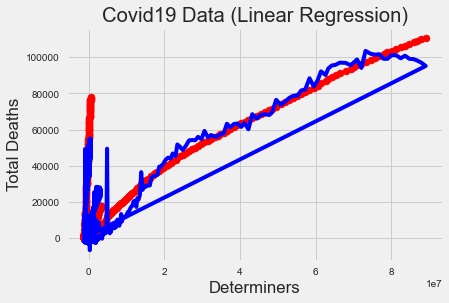

In [46]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x_new, Y, color='red')
    plt.plot(x_new, model.predict(X), color='blue')
    plt.title('Covid19 Data (Linear Regression)')
    plt.xlabel('Determiners')
    plt.ylabel('Total Deaths')
    plt.show()
    return
viz_polymonial()